In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as pl
# Load the online news dataset
df = pd.read_csv("normalized.csv")
display(df.head())


,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.872236,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0.0
1,9.0,255.0,0.845649,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0.0
2,9.0,211.0,0.831614,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1.0
3,9.0,531.0,0.795700,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0.0
4,13.0,1072.0,0.746290,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0.0


In [2]:
X = df.drop('shares',axis =1)
y = df.shares

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('shares',axis =1), df.shares, test_size=0.3, random_state=0)

C:\Users\lalwa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Text(0,0.5,'Feature Importance Score')

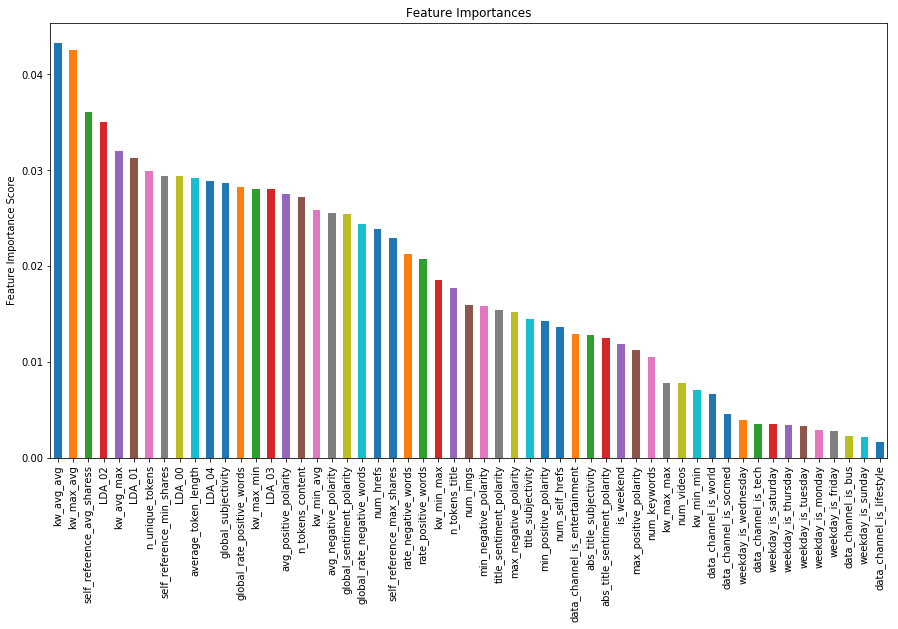

In [4]:
rfclassifier = RandomForestClassifier(random_state=0)
rfclassifier.fit(X_train, y_train)
rfclassifier.predict(X_test)
rfclassifier.score(X_train, y_train) , rfclassifier.score(X_test, y_test)

rfclassifier.feature_importances_

feat_imp = pd.Series(rfclassifier.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
pl.ylabel('Feature Importance Score')

In [5]:
import pickle
filename = 'rfclassifier.pkl'
pickle.dump(rfclassifier, open(filename, 'wb'))

In [39]:
estimator = AdaBoostClassifier(random_state=0)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, y_train)
selector.ranking_

estimator_LR = LogisticRegression(solver = 'lbfgs',random_state=0)
selector_LR = RFECV(estimator_LR, step=1, cv=5)
selector_LR = selector_LR.fit(X_train, y_train)
selector_LR.ranking_

estimator_RF = RandomForestClassifier(random_state=5)
selector_RF = RFECV(estimator_RF, step=1, cv=5)
selector_RF = selector_RF.fit(X_train, y_train)
selector_RF.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  1, 10,  4,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  7,  6,  5,  9,  2, 12,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1])

# Plotting the graphs based on the feature-importance of three models
## the number of selected features given below the graph 

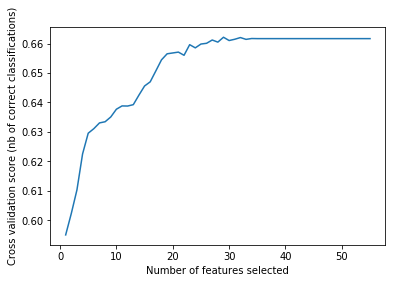

29
['n_unique_tokens' 'num_hrefs' 'num_self_hrefs' 'num_imgs' 'num_videos'
 'num_keywords' 'data_channel_is_entertainment' 'data_channel_is_socmed'
 'data_channel_is_tech' 'data_channel_is_world' 'kw_max_min' 'kw_min_max'
 'kw_max_max' 'kw_avg_max' 'kw_min_avg' 'kw_max_avg' 'kw_avg_avg'
 'self_reference_min_shares' 'self_reference_avg_sharess'
 'weekday_is_friday' 'is_weekend' 'LDA_00' 'LDA_01' 'global_subjectivity'
 'global_rate_positive_words' 'rate_negative_words'
 'avg_positive_polarity' 'min_positive_polarity' 'title_subjectivity']


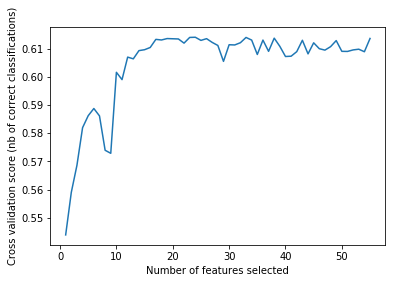

24
['n_tokens_title' 'n_tokens_content' 'num_hrefs' 'num_self_hrefs'
 'num_imgs' 'num_videos' 'average_token_length' 'num_keywords'
 'data_channel_is_entertainment' 'data_channel_is_socmed'
 'data_channel_is_tech' 'data_channel_is_world' 'kw_min_min' 'kw_max_min'
 'kw_max_max' 'kw_min_avg' 'kw_max_avg' 'kw_avg_avg'
 'self_reference_min_shares' 'self_reference_avg_sharess'
 'weekday_is_saturday' 'is_weekend' 'LDA_02' 'LDA_04']


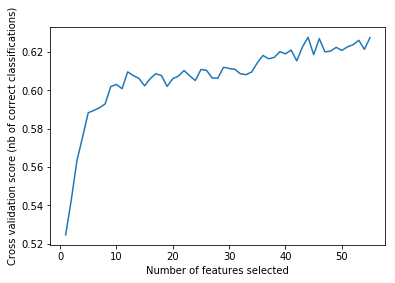

44
['n_tokens_title' 'n_tokens_content' 'n_unique_tokens' 'num_hrefs'
 'num_self_hrefs' 'num_imgs' 'num_videos' 'average_token_length'
 'num_keywords' 'data_channel_is_entertainment' 'data_channel_is_tech'
 'kw_min_min' 'kw_max_min' 'kw_min_max' 'kw_max_max' 'kw_avg_max'
 'kw_min_avg' 'kw_max_avg' 'kw_avg_avg' 'self_reference_min_shares'
 'self_reference_max_shares' 'self_reference_avg_sharess' 'is_weekend'
 'LDA_00' 'LDA_01' 'LDA_02' 'LDA_03' 'LDA_04' 'global_subjectivity'
 'global_sentiment_polarity' 'global_rate_positive_words'
 'global_rate_negative_words' 'rate_positive_words' 'rate_negative_words'
 'avg_positive_polarity' 'min_positive_polarity' 'max_positive_polarity'
 'avg_negative_polarity' 'min_negative_polarity' 'max_negative_polarity'
 'title_subjectivity' 'title_sentiment_polarity' 'abs_title_subjectivity'
 'abs_title_sentiment_polarity']


In [43]:
# Plot the cv score vs number of features
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
pl.savefig('RFE_ADA.pdf')
pl.show()

print(X_train.columns.values[selector.ranking_==1].shape[0])
print(X_train.columns.values[selector.ranking_==1])
features_ADA = X[X.columns.values[selector.ranking_==1]]

pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
pl.savefig('RFE_LR.pdf')
pl.show()

print(X_train.columns.values[selector_LR.ranking_==1].shape[0])
print(X_train.columns.values[selector_LR.ranking_==1])
features_LR = X[X.columns.values[selector_LR.ranking_==1]]

pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_RF.grid_scores_) + 1), selector_RF.grid_scores_)
pl.savefig('RFE_RF.pdf')
pl.show()

print(X_train.columns.values[selector_RF.ranking_==1].shape[0])
print(X_train.columns.values[selector_RF.ranking_==1])
features_RF = X[X.columns.values[selector_RF.ranking_==1]]

# Spliting data into training and testing sets (90:10)

In [47]:

from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score, precision_score
from sklearn.cross_validation import train_test_split


X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, y, test_size = 0.1, random_state = 0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, y, test_size = 0.1, random_state = 0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, y, test_size = 0.1, random_state = 0)

print("Training set has {} samples.".format(X_train_ADA.shape[0]))
print("Testing set has {} samples.".format(X_test_ADA.shape[0]))

Training set has 35679 samples.
Testing set has 3965 samples.


# Calculating Evaluation Metrics

In [55]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']))
    # Return the results
    return results

# Method to evaluate the results of models and plot the graphs

In [59]:
import matplotlib.patches as mpatches
def evaluate(results,name):

    # Create figure
    fig, ax = pl.subplots(2, 4, figsize = (16,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
   
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j//4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j//4, j%4].set_xlim((-0.1, 3.0))
               
    # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Training Subset")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches,  bbox_to_anchor = (-1.4, 2.54),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.savefig(name)
    pl.tight_layout()
    pl.show()

# Training the models with refined hyperparameters

AdaBoostClassifier trained on 356 samples.
AdaBoostClassifier with accuracy 0.5687263556116016, F1 0.5930509281294623 and AUC 0.5671537414105279.
AdaBoostClassifier trained on 3567 samples.
AdaBoostClassifier with accuracy 0.6461538461538462, F1 0.6724258697174877 and AUC 0.6437424461877769.
AdaBoostClassifier trained on 35679 samples.
AdaBoostClassifier with accuracy 0.6711223203026482, F1 0.6978683966635774 and AUC 0.6683522498562575.
LogisticRegression trained on 356 samples.
LogisticRegression with accuracy 0.6070617906683481, F1 0.6406826568265681 and AUC 0.6038703068155091.
LogisticRegression trained on 3567 samples.
LogisticRegression with accuracy 0.6209331651954603, F1 0.6660742057320596 and AUC 0.6156624167199377.
LogisticRegression trained on 35679 samples.
LogisticRegression with accuracy 0.6224464060529634, F1 0.6615419398598237 and AUC 0.6181793762878788.
RandomForestClassifier trained on 356 samples.
RandomForestClassifier with accuracy 0.6221941992433796, F1 0.656106519

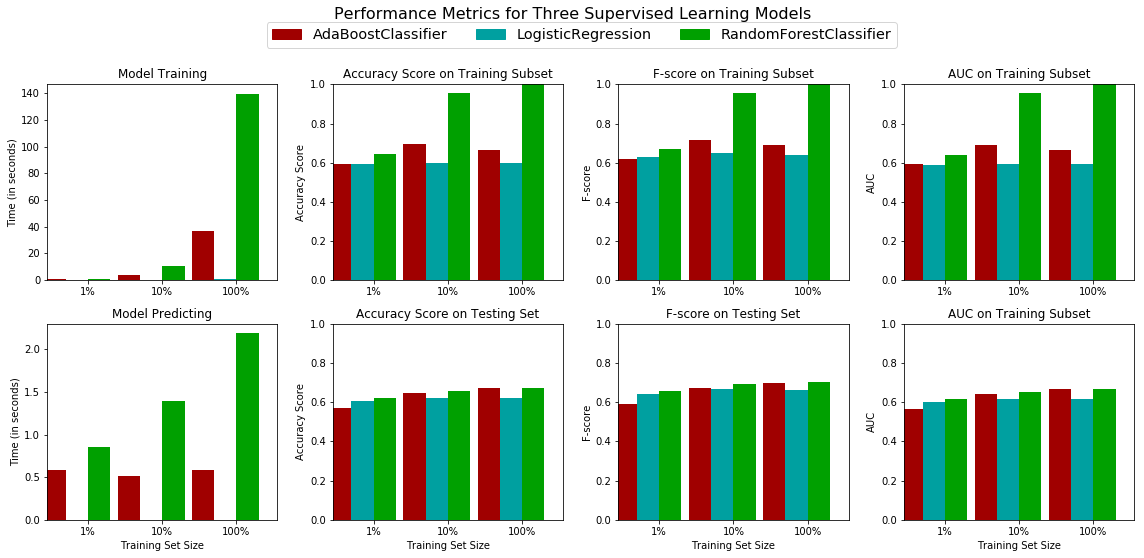

In [60]:
clf_A = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
clf_B = LogisticRegression(random_state=0, C=2.5)
clf_C = RandomForestClassifier(random_state=0, n_estimators=500)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_opt.pdf')

# Method for grid search

In [61]:
def gridsearch(clf,parameters,X_train, y_train, X_test, y_test):
    scorer = make_scorer(roc_auc_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
    best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
    print(clf.__class__.__name__)
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print( "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta=1)))
    print("AUC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1)))
    print("Final AUC on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))

    print(best_clf)

# Hyperparameters for the grid search for 

In [62]:

from sklearn.metrics import make_scorer 
from sklearn.grid_search import GridSearchCV
parameters_RF = {"n_estimators": [10,20,50,100,250,500]}
parameters_LR = {"penalty": ['l1','l2'],
              "C": [0.1,0.5,1.,2.,2.5,5]}
parameters_ADA = {"n_estimators": [100,200,300,400],
              "learning_rate": [0.1,0.5,1]}

C:\Users\lalwa\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Run the classifier with refined hyperparameters

AdaBoostClassifier trained on 356 samples.
AdaBoostClassifier with accuracy 0.5687263556116016, F1 0.5930509281294623 and AUC 0.5671537414105279.
AdaBoostClassifier trained on 3567 samples.
AdaBoostClassifier with accuracy 0.6461538461538462, F1 0.6724258697174877 and AUC 0.6437424461877769.
AdaBoostClassifier trained on 35679 samples.
AdaBoostClassifier with accuracy 0.6711223203026482, F1 0.6978683966635774 and AUC 0.6683522498562575.
LogisticRegression trained on 356 samples.
LogisticRegression with accuracy 0.6070617906683481, F1 0.6406826568265681 and AUC 0.6038703068155091.
LogisticRegression trained on 3567 samples.
LogisticRegression with accuracy 0.6209331651954603, F1 0.6660742057320596 and AUC 0.6156624167199377.
LogisticRegression trained on 35679 samples.
LogisticRegression with accuracy 0.6224464060529634, F1 0.6615419398598237 and AUC 0.6181793762878788.
RandomForestClassifier trained on 356 samples.
RandomForestClassifier with accuracy 0.6221941992433796, F1 0.656106519

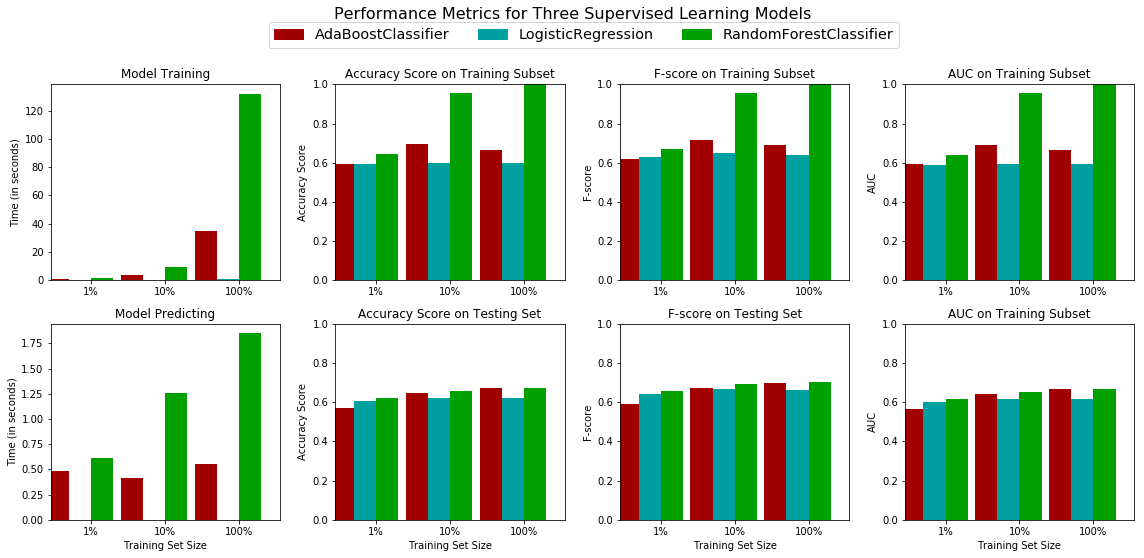

In [63]:
clf_A = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
clf_B = LogisticRegression(random_state=0, C=2.5)
clf_C = RandomForestClassifier(random_state=0, n_estimators=500)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_opt.pdf')

# GRID SEARCH RANDOM FOREST

In [67]:
gridsearch(clf_C,parameters_RF,X_train_RF, y_train_RF, X_test_RF, y_test_RF)

RandomForestClassifier
Unoptimized model
------
Accuracy score on testing data: 0.6728
F-score on testing data: 0.7065
AUC on testing data: 0.6685

Optimized Model
------
Final accuracy score on the testing data: 0.6728
Final F-score on the testing data: 0.7065
Final AUC on the testing data: 0.6685
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


# GRID SEARCH LOGISTIC REGRESSION

In [70]:
gridsearch(clf_B,parameters_LR,X_train_LR, y_train_LR, X_test_LR, y_test_LR)

LogisticRegression
Unoptimized model
------
Accuracy score on testing data: 0.6126
F-score on testing data: 0.6541
AUC on testing data: 0.6078

Optimized Model
------
Final accuracy score on the testing data: 0.6502
Final F-score on the testing data: 0.6788
Final AUC on the testing data: 0.6473
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# GRID SEARCH ADATIVE BOOSTING

In [ ]:
gridsearch(clf_A,parameters_ADA,X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)

# Run the classifier with diferent training/testing set split ratio

### To test the robustness of the model, we change split ratio of training/testing set from 0.1 to 0.15, and then run the three classifiers with the same hyperparameters.

Training set has 33697 samples.
Testing set has 5947 samples.
AdaBoostClassifier trained on 336 samples.
AdaBoostClassifier with accuracy 0.5737346561291408, F1 0.6070376685785149 and AUC 0.5708079456435724.
AdaBoostClassifier trained on 3369 samples.
AdaBoostClassifier with accuracy 0.6460400201782411, F1 0.6766016285143648 and AUC 0.642795318500933.
AdaBoostClassifier trained on 33697 samples.
AdaBoostClassifier with accuracy 0.6670590213553051, F1 0.6956655395019982 and AUC 0.6639049329710539.
LogisticRegression trained on 336 samples.
LogisticRegression with accuracy 0.5981166974945351, F1 0.6191841937539834 and AUC 0.5968759869209157.
LogisticRegression trained on 3369 samples.
LogisticRegression with accuracy 0.6189675466621826, F1 0.6604734791729099 and AUC 0.6141209552123945.
LogisticRegression trained on 33697 samples.
LogisticRegression with accuracy 0.6125777703043551, F1 0.654054054054054 and AUC 0.6078410753308794.
RandomForestClassifier trained on 336 samples.
RandomFores

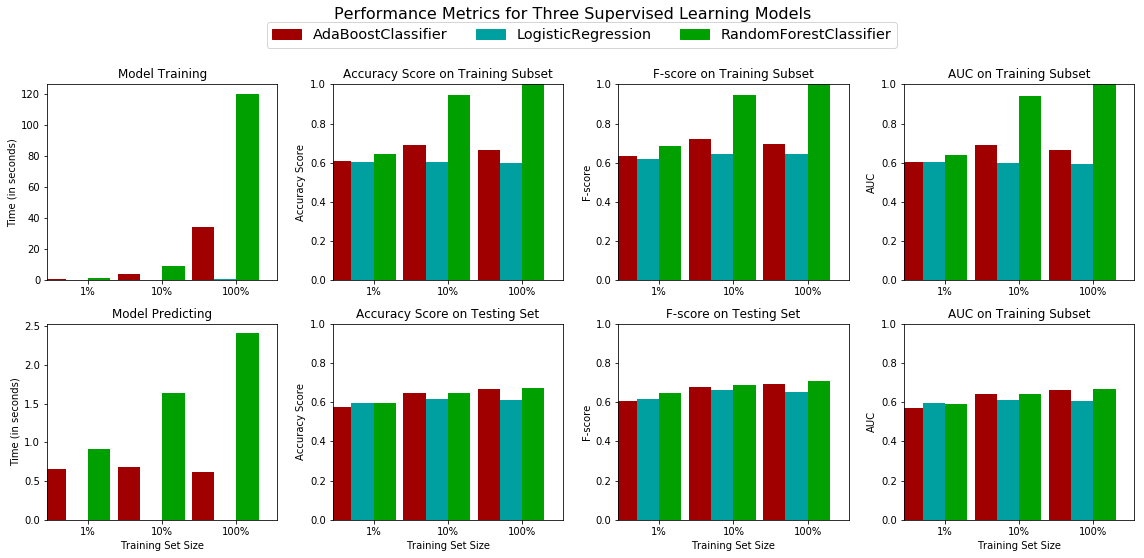

In [64]:

X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, y, test_size = 0.15, random_state = 0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, y, test_size = 0.15, random_state = 0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, y, test_size = 0.15, random_state = 0)

print("Training set has {} samples.".format(X_train_ADA.shape[0]))
print("Testing set has {} samples.".format(X_test_ADA.shape[0]))

samples_1 = int(X_train_ADA.shape[0]*0.01)
samples_10 = int(X_train_ADA.shape[0]*0.1)
samples_100 = X_train_ADA.shape[0]

clf_A = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
clf_B = LogisticRegression(random_state=0, C=2.5)
clf_C = RandomForestClassifier(random_state=0, n_estimators=500)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_opt_test.pdf')

# Conclusion:

We conclude with the above metrics the random Forest Classifier gives the good accuracy compared to other 2 models.